## Dependency Parsing with Stanford NLP
Note: can use instructions within this notebook to configure Stanford - or - run on RCC Midway with "nlp_class" kernel

Download an install Graphviz: http://www.graphviz.org/download/

In [1]:
#pip install graphviz
#conda install python-graphviz

In [2]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]


## Leveraging Stanford NLP

### Installing and configuring Stanford NLP
https://blog.manash.me/configuring-stanford-parser-and-stanford-ner-tagger-with-nltk-in-python-on-windows-f685483c374a

In [3]:
from nltk.tag import StanfordNERTagger
from nltk.parse.stanford import StanfordDependencyParser
from nltk.tokenize import word_tokenize

import os
from graphviz import Source

# Change the path according to your system
stanford_classifier = os.getenv('STANFORD_CLASSIFIER')
stanford_ner_path = os.getenv('STANFORD_NER_PATH')

stanford_parser_path = os.getenv('STANFORD_PARSER_PATH')
stanford_parser_models_path = os.getenv('STANFORD_PARSER_PATH')

# Creating Tagger Object
st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')
sdp = StanfordDependencyParser(path_to_jar=stanford_parser_path, path_to_models_jar=stanford_parser_models_path)

/project/msca/ivy2/software/Anaconda3-2019.07/envs/nlp_class/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.


In [4]:
text = 'I shot an elephant in my pajamas'
%time result = sdp.raw_parse(text)
dep = next(result)
list(dep.triples())

CPU times: user 4.57 ms, sys: 7.69 ms, total: 12.3 ms
Wall time: 3.93 s


[(('shot', 'VBD'), 'nsubj', ('I', 'PRP')),
 (('shot', 'VBD'), 'dobj', ('elephant', 'NN')),
 (('elephant', 'NN'), 'det', ('an', 'DT')),
 (('shot', 'VBD'), 'nmod', ('pajamas', 'NNS')),
 (('pajamas', 'NNS'), 'case', ('in', 'IN')),
 (('pajamas', 'NNS'), 'nmod:poss', ('my', 'PRP$'))]

In [5]:
for triple in dep.triples():
    print (triple[1],"(",triple[0][0],", ",triple[2][0],")")

nsubj ( shot ,  I )
dobj ( shot ,  elephant )
det ( elephant ,  an )
nmod ( shot ,  pajamas )
case ( pajamas ,  in )
nmod:poss ( pajamas ,  my )


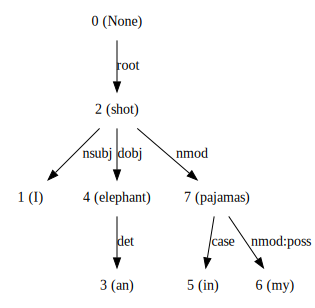

In [6]:
result = list(sdp.raw_parse(text))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
Source(dep_tree_dot_repr)

In [7]:
text = 'The brown fox is quick and he is jumping over the lazy dog'
result = sdp.raw_parse(text)
dep = next(result)
list(dep.triples())

[(('quick', 'JJ'), 'nsubj', ('fox', 'NN')),
 (('fox', 'NN'), 'det', ('The', 'DT')),
 (('fox', 'NN'), 'amod', ('brown', 'JJ')),
 (('quick', 'JJ'), 'cop', ('is', 'VBZ')),
 (('quick', 'JJ'), 'cc', ('and', 'CC')),
 (('quick', 'JJ'), 'conj', ('jumping', 'VBG')),
 (('jumping', 'VBG'), 'nsubj', ('he', 'PRP')),
 (('jumping', 'VBG'), 'aux', ('is', 'VBZ')),
 (('jumping', 'VBG'), 'nmod', ('dog', 'NN')),
 (('dog', 'NN'), 'case', ('over', 'IN')),
 (('dog', 'NN'), 'det', ('the', 'DT')),
 (('dog', 'NN'), 'amod', ('lazy', 'JJ'))]

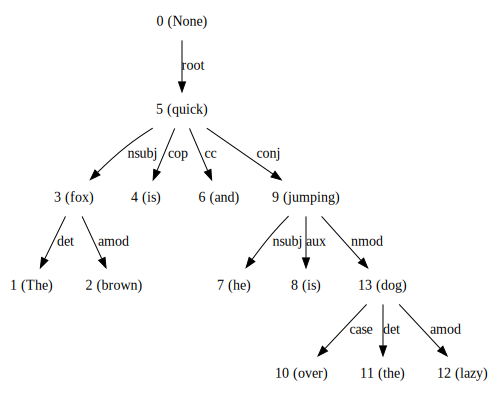

In [8]:
result = list(sdp.raw_parse(text))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
Source(dep_tree_dot_repr)

In [9]:
text = "Surging Chinese demand and an improving U.S. economy have lifted sales of Caterpillar's \
signature yellow mining and construction machines."
%time result = sdp.raw_parse(text)
dep = next(result)
list(dep.triples())

CPU times: user 1.59 ms, sys: 8.75 ms, total: 10.3 ms
Wall time: 1.46 s


[(('Surging', 'VBG'), 'dobj', ('demand', 'NN')),
 (('demand', 'NN'), 'amod', ('Chinese', 'JJ')),
 (('Surging', 'VBG'), 'cc', ('and', 'CC')),
 (('Surging', 'VBG'), 'conj', ('lifted', 'VBN')),
 (('lifted', 'VBN'), 'nsubj', ('economy', 'NN')),
 (('economy', 'NN'), 'det', ('an', 'DT')),
 (('economy', 'NN'), 'amod', ('improving', 'VBG')),
 (('economy', 'NN'), 'compound', ('U.S.', 'NNP')),
 (('lifted', 'VBN'), 'aux', ('have', 'VBP')),
 (('lifted', 'VBN'), 'dobj', ('sales', 'NNS')),
 (('sales', 'NNS'), 'nmod', ('machines', 'NNS')),
 (('machines', 'NNS'), 'case', ('of', 'IN')),
 (('machines', 'NNS'), 'nmod:poss', ('Caterpillar', 'NNP')),
 (('Caterpillar', 'NNP'), 'case', ("'s", 'POS')),
 (('machines', 'NNS'), 'amod', ('signature', 'JJ')),
 (('machines', 'NNS'), 'amod', ('yellow', 'JJ')),
 (('machines', 'NNS'), 'compound', ('mining', 'NN')),
 (('mining', 'NN'), 'cc', ('and', 'CC')),
 (('mining', 'NN'), 'conj', ('construction', 'NN'))]

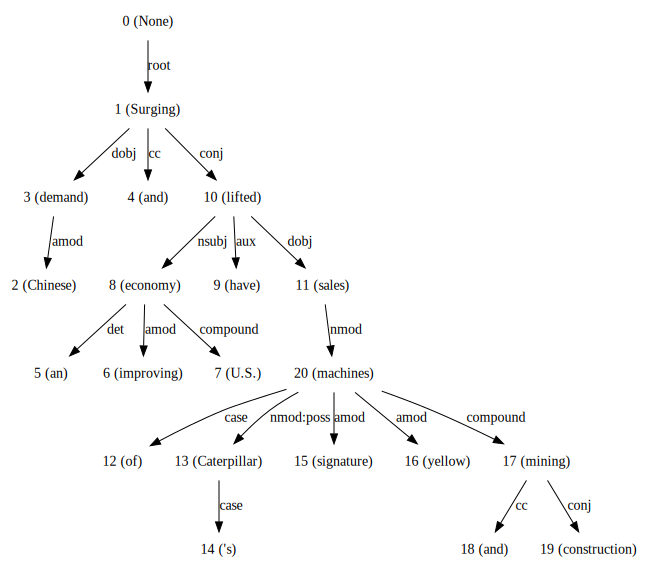

In [10]:
result = list(sdp.raw_parse(text))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
Source(dep_tree_dot_repr)

In [11]:
import datetime
datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S")

'Fri, 17 April 2020 10:09:15'